# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [3]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [4]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [5]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T13:01:29+0300',
 'created_at': '2023-03-01T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [6]:
data['found']

256

Количество страниц в результатах поиска

In [7]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [8]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,None,None,2023-03-03T16:06:49+0300,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [9]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [10]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

Ключевые слова по которым будем искать:

In [11]:
req_texts = [
    "Data Analyst",
    "Аналитик данных",
    "Аналитик",
    "Data Scientist",
    "ML-разработчик",
    "Machine Learning Engineer",
    "ML Engineer",
    "Machine Learner",
    "Data Engineer",
    "Аналитик данных",
]

Парсим по ключевым словам вакансии:

In [12]:
URL = "https://api.hh.ru/vacancies"

data_arrs = []
for page_num in range(15):
    for text in req_texts:
        params = {
            "text": text,
            "area": 1,
            "page": page_num,
            "per_page": 50,
        }
        req = requests.get(URL, params)
        data = json.loads(req.content.decode())
        data_arrs.append(data)
        sleep(0.5)

Все вакансии сливаем в один DataFrame

In [13]:
vacancies = pd.DataFrame()
for data in data_arrs:
    vacancies = pd.concat([pd.json_normalize(data["items"]), vacancies], axis=0)

vacancies.reset_index(inplace=True)

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [14]:
vacancies.drop_duplicates(subset=['id'], inplace=True)

In [15]:
vacancies.to_csv('vacancies.csv')

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [16]:
main_df = pd.DataFrame()
last = 0
delta = 0.01
counter = 0
for idx in vacancies.index:
    counter += 1
    vacancy_id = vacancies["id"].loc[idx]
    vacancy_url = f"https://api.hh.ru/vacancies/{vacancy_id}"

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    main_df = pd.concat([main_df, pd.json_normalize(vacancy_info)], axis=0)
    if counter / len(vacancies.index) >= last:
        print(str(int(100 * last)) + "%")
        last += delta
    sleep(0.5)

print("loading is complete!")

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
10%
11%
12%
13%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%
loading is complete!


##### Сохраняем в csv

In [17]:
main_df.to_csv('main_table.csv')

In [18]:
main_df.reset_index(inplace=True)

#### Таблица с нужными полями

In [19]:
vacancy_table = main_df[
    [
        "index",
        "id",
        "name",
        "insider_interview",
        "description",
        "key_skills",
        "area.name",
        "salary.from",
        "salary.to",
        "salary.currency",
        "salary.gross",
        "employment.name",
        "address.city",
    ]
].copy()
vacancy_table.reset_index(inplace=True)
display(vacancy_table.head(-5))

,level_0,index,id,name,insider_interview,description,key_skills,area.name,salary.from,salary.to,salary.currency,salary.gross,employment.name,address.city
0,0,0,75643830,Ведущий аналитик BI,None,<p>Мы являемся разработчиками BI-системы - сис...,[],Москва,NaN,NaN,NaN,NaN,Полная занятость,Москва
1,1,0,76989071,Социолог-аналитик,None,<p><strong>Обязанности:</strong></p> <p>Органи...,"[{'name': 'Статистический анализ'}, {'name': '...",Москва,NaN,NaN,NaN,NaN,Полная занятость,None
2,2,0,76985890,Ведущий аналитик,None,<strong>Задачи:</strong> <ul> <li>аналитика ре...,[],Москва,NaN,NaN,NaN,NaN,Полная занятость,NaN
3,3,0,76552089,Аналитик-исследователь (Маркетинговая служба),None,<p><strong>АО &quot;ПОЧТА БАНК&quot;</strong> ...,"[{'name': 'Маркетинговый анализ'}, {'name': 'М...",Москва,NaN,NaN,NaN,NaN,Полная занятость,Москва
4,4,0,76372293,Экономист-аналитик,None,<p><strong><em>УВАЖЕМЫЕ КАНДИДАТЫ! ПРОСЬБА ОТБ...,"[{'name': 'Финансовая отчетность'}, {'name': '...",Москва,None,120000.0,RUR,True,Полная занятость,Московский
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2560,0,77411849,Data Analyst (senior),None,"<p>Мы – Компания, которая входит в «Реестр акк...","[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",Москва,200000,300000,RUR,False,Полная занятость,NaN
2561,2561,0,76670131,Data Analyst,None,<p>Компания является глобальным технологически...,"[{'name': 'Английский язык'}, {'name': 'Работа...",Москва,NaN,NaN,NaN,NaN,Полная занятость,NaN
2562,2562,0,77504201,Data Analyst,NaN,<p><strong>Чем предстоит заниматься:</strong><...,"[{'name': 'SQL'}, {'name': 'Scrum'}, {'name': ...",Москва,NaN,NaN,NaN,NaN,Полная занятость,NaN
2563,2563,0,68822135,Data Analyst (финансовый мониторинг),None,<p>В Росбанке возможен полностью дистанционный...,"[{'name': 'SQL'}, {'name': 'PowerBI'}, {'name'...",Москва,NaN,NaN,NaN,NaN,Полная занятость,NaN


#### Сделаем формат key_skills более читаемым

In [20]:
def expand_list(List):
    if isinstance(List, list):
        return [d['name'] for d in List]
    return None

In [21]:
vacancy_table.key_skills = vacancy_table.key_skills.apply(expand_list)

##### Загрузим в xlsx

In [22]:
vacancy_table.to_excel("vacancy_table.xlsx")  

##### Загрузим в csv

In [23]:
vacancy_table.to_csv('vacancy_table.csv')

In [24]:
def make_list_from_str(list_str):
    if not isinstance(list_str, str):
        return None
    if len(list_str) == 2:
        return None
    return list_str[1:-1].replace("'", "").replace(" ", "").split(",")


def read_vacancy_table():
    vacancy_table_readed = pd.read_csv("vacancy_table.csv")
    vacancy_table_readed.key_skills = (vacancy_table_readed.key_skills).apply(
        make_list_from_str
    )
    return vacancy_table_readed

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [25]:
print(len(vacancy_table.id))

2570


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Запишем в словарь количество встречающихся навыков сопоставив названиям кол-во вхождений

In [26]:
skill_number_mapping = dict()
for skill_list in vacancy_table.key_skills:
    if (skill_list) == None:
        continue
    for skill in skill_list:
        if skill_number_mapping.get(skill) != None:
            skill_number_mapping[skill] += 1
        else:
            skill_number_mapping[skill] = 1

Выделяем top 15

In [27]:
skills = pd.DataFrame(
    {"name": skill_number_mapping.keys(), "count": skill_number_mapping.values()}
)
top = skills.sort_values(by="count", ascending=False)[0:15]
print("Данные 15 навыков самые популярные:")
display(list(top["name"]))

Данные 15 навыков самые популярные:


['SQL',
 'Python',
 'Аналитическое мышление',
 'Анализ данных',
 'MS PowerPoint',
 'Английский язык',
 'Работа с большим объемом информации',
 'MS Excel',
 'MS SQL',
 'Hadoop',
 'PostgreSQL',
 'Linux',
 'Аналитические исследования',
 'Аналитика',
 'Power BI']

Построим гистрограмму

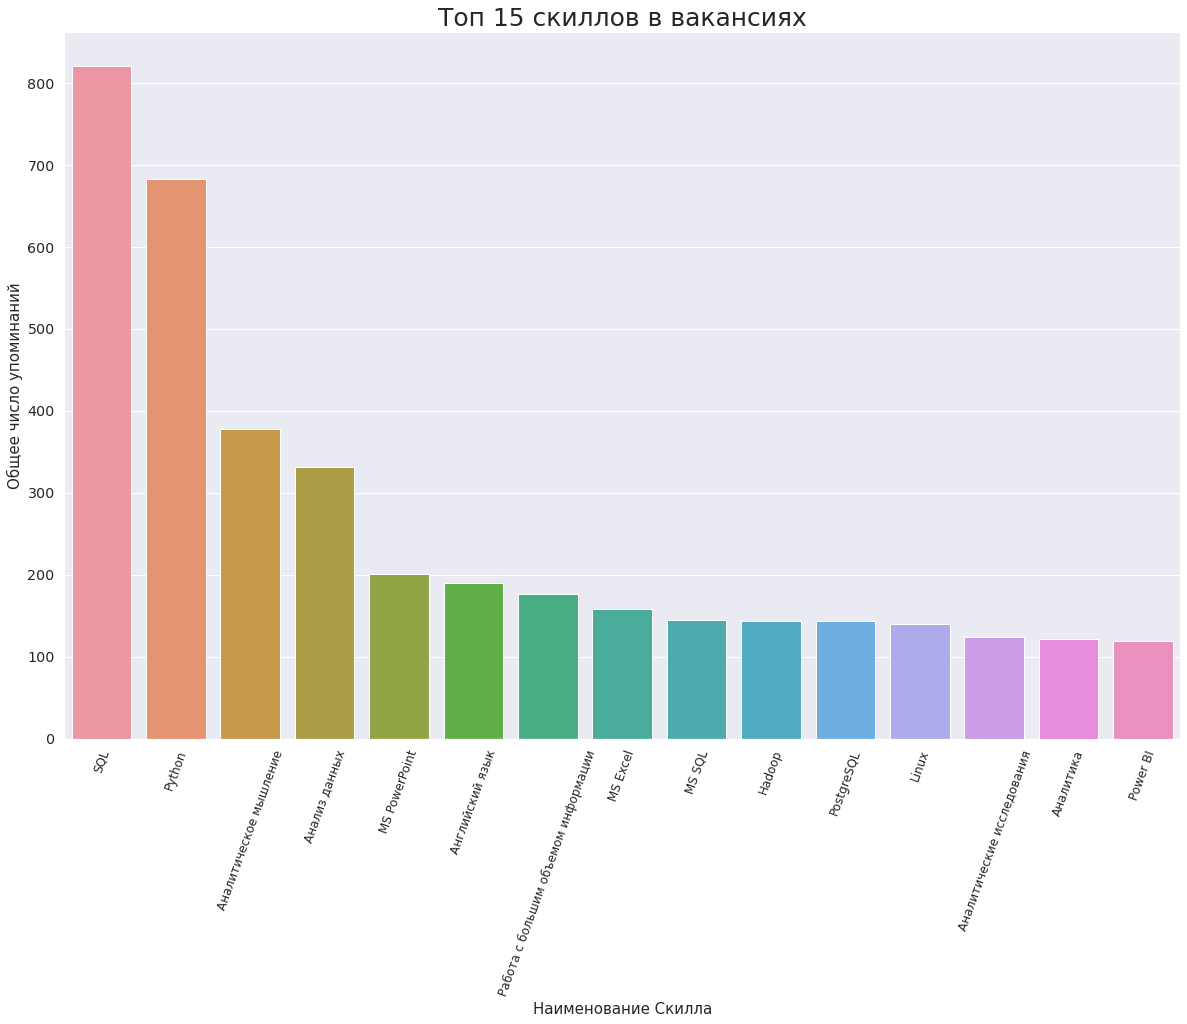

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize = (20,13))
ax = sns.barplot(data = top, x = 'name', y = 'count')
plt.title("Топ 15 скиллов в вакансиях", fontsize=25)
plt.ylabel("Общее число упоминаний", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 12)
plt.xlabel("Наименование Скилла", fontsize=15)
print()

Построим Pie

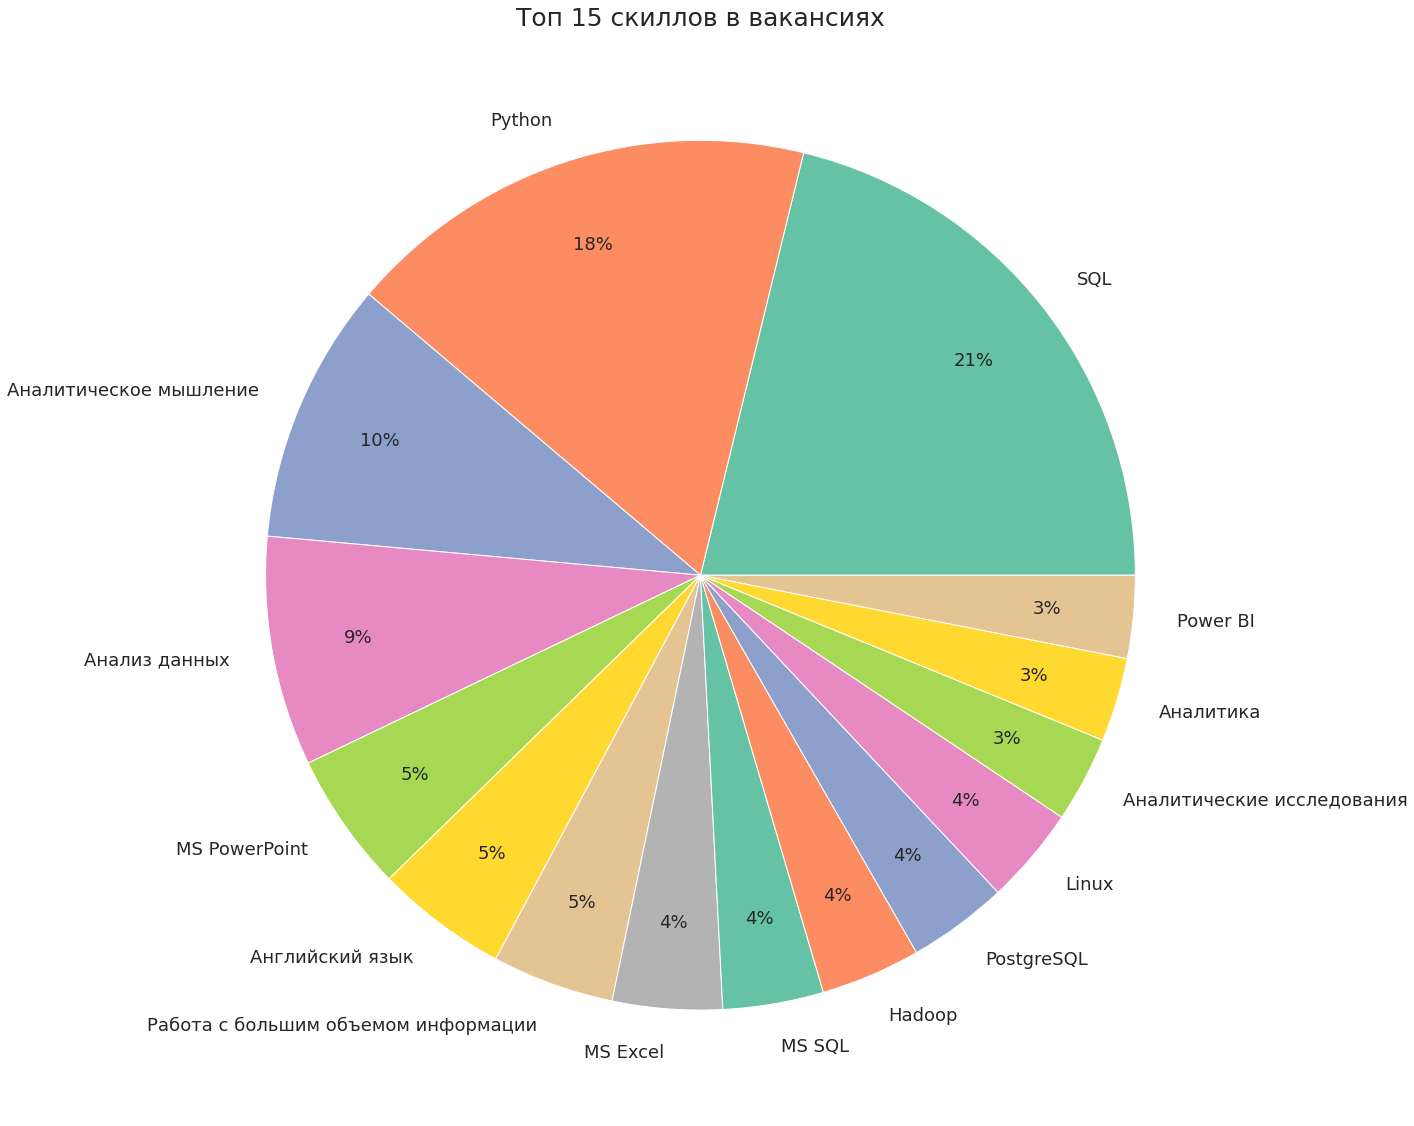

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.pie(
    top["count"],
    labels=top["name"],
    autopct="%1.f%%",
    pctdistance=0.8,
    textprops={"fontsize": 18},
)
plt.title("Топ 15 скиллов в вакансиях", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize=12)
print()

#### Краткий вывод:
1) Как видно из гафиков самые важные инструменты для анализа данных - это SQL, Python, а также собственно часто учитываются навыки "Аналитическое мышление" и "Анализ данных"
2) Важно также иметь много сторонних наывыков таких как английский язык или знание Linux

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Преобразуем поле gross так:
- если True то выставим 1
- False - 0
- Nan - 0.5 - т.к. примерно с такой вероятностью там действительно gross == True

In [30]:
def make_gross(x):
    if x == 0.5:
        return x
    return int(x)


vacancy_table["salary.gross"] = vacancy_table["salary.gross"].fillna(0.5)
vacancy_table["salary.gross"] = vacancy_table["salary.gross"].apply(make_gross)

Учтем gross, при этом при неопределенности будем считать что в среднем 50/50

In [31]:
vacancy_table["salary.gross"]
vacancy_table["salary.from"] = vacancy_table["salary.from"] * (
    1 - 0.13 * vacancy_table["salary.gross"]
)
vacancy_table["salary.to"] = vacancy_table["salary.to"] * (
    1 - 0.13 * vacancy_table["salary.gross"]
)

Переведем все валюты в рубли

Если значения не упомянуты считаем их рублями

In [32]:
vacancy_table['salary.currency'].fillna('RUR', inplace=True)

меняем курс и сразу currency

In [33]:
vacancy_table.loc[vacancy_table["salary.currency"] == "USD", "salary.to"] *= 75.46
vacancy_table.loc[vacancy_table["salary.currency"] == "USD", "salary.from"] *= 75.46
vacancy_table.loc[vacancy_table["salary.currency"] == "EUR", "salary.to"] *= 80.19
vacancy_table.loc[vacancy_table["salary.currency"] == "EUR", "salary.from"] *= 80.19

In [34]:
vacancy_table['salary.currency'] = 'RUR'

Строим гистрограмму для нижней и верхней границы

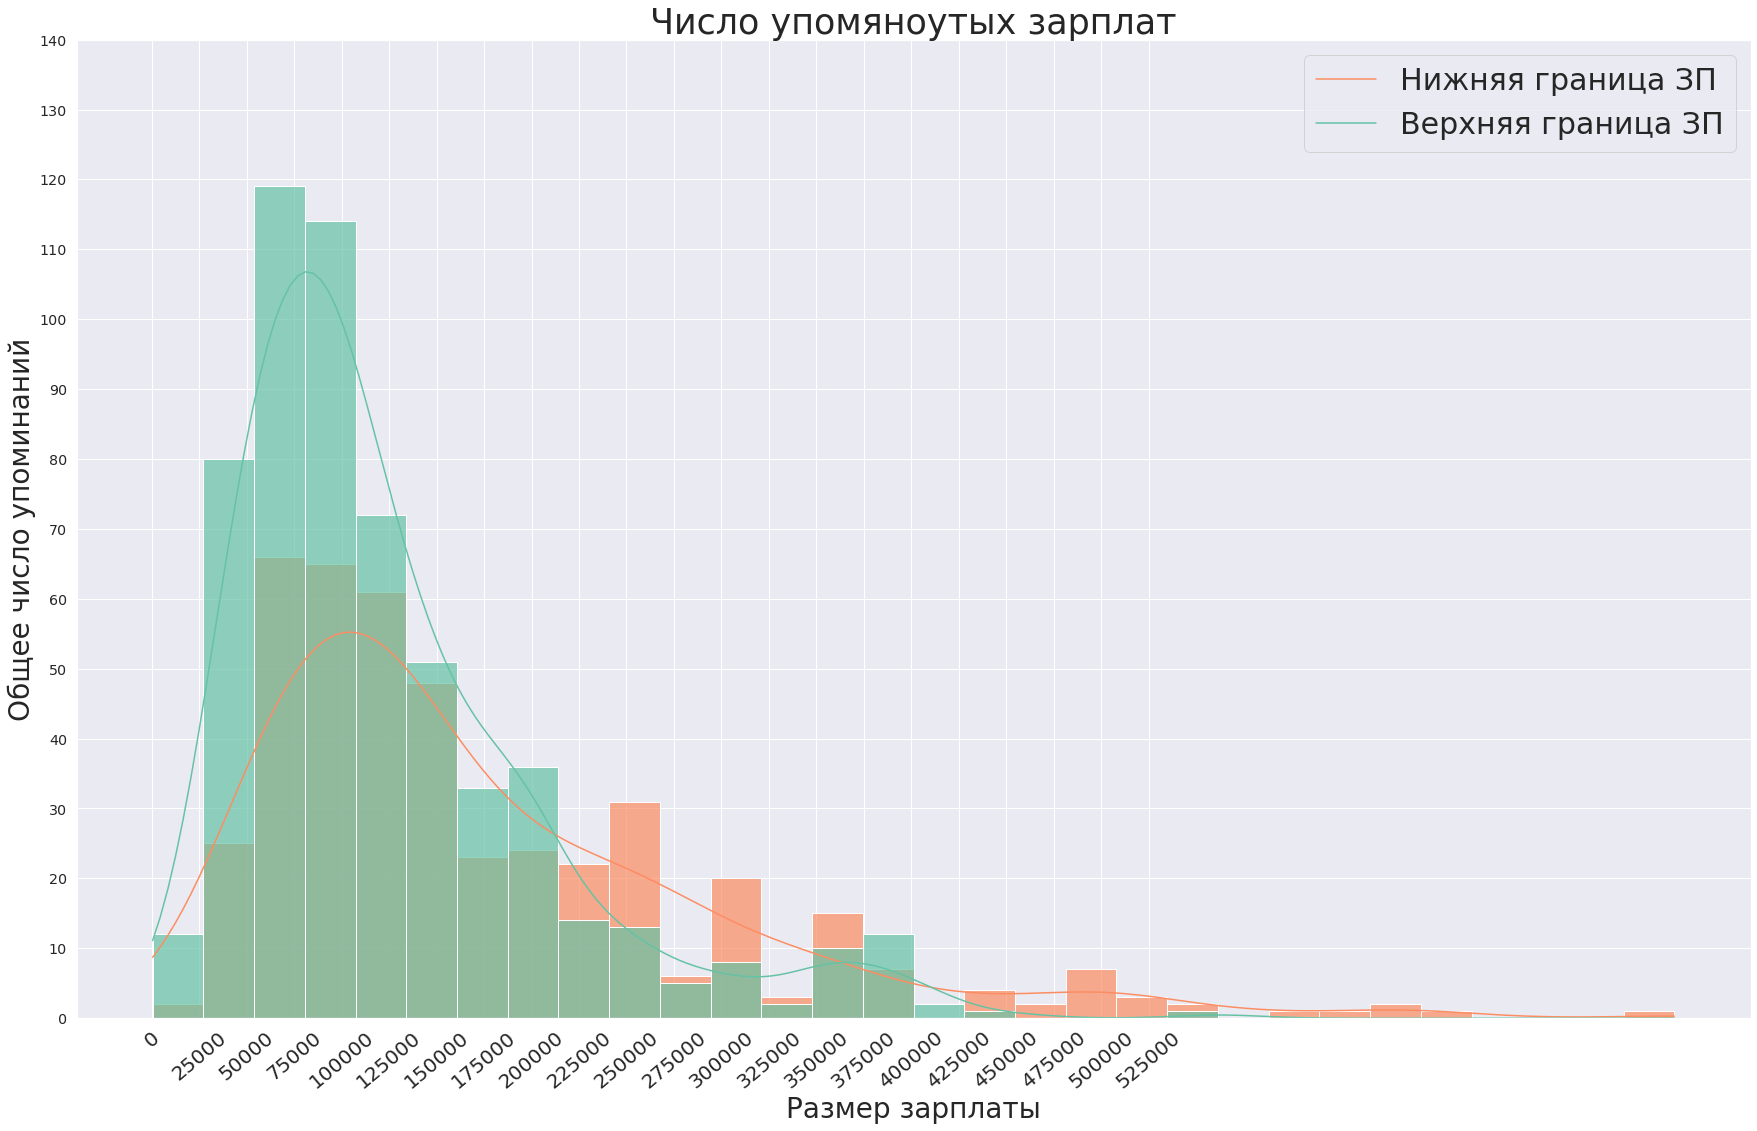

In [35]:
plt.subplots(figsize=(30, 18))
sns.histplot(
    data=vacancy_table[["salary.from", "salary.to"]], bins=30, alpha=0.7, kde=True
)
plt.xticks(range(0, 550000, 25000), fontsize=20)
plt.yticks(range(0, 150, 10))
plt.title("Число упомяноутых зарплат", fontsize=35)
plt.ylabel("Общее число упоминаний", fontsize=28)
plt.xlabel("Размер зарплаты", fontsize=28)
plt.xticks(rotation=40)
plt.legend(labels=["Нижняя граница ЗП", "Верхняя граница ЗП"], fontsize=30)
print()

#### Вывод из графика:
1) большинство работодателей готовы платить как от так и до в основном от 50 до 150 т.р.  
2) из этого промужутка самое частое - от 75 до 100 т.р.  
3) Не редко ЗП доходит и до 200 т.р.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

### Исследуем FrontEnd

##### Ключевые слова

In [36]:
req_texts_for_frontend = [
    "FrontEnd",
    "front-end",
    "Верстка",
    "Верстальщик",
    "html, css",
]

Парсим по ключевым словам

In [37]:
URL = 'https://api.hh.ru/vacancies'


frontend_data_arrs = []
for page_num in range(15):
    for text in req_texts_for_frontend: 
        params = {
            'text': text,
            'area': 1,
            'page': page_num,
            'per_page': 50
        }
        req = requests.get(URL, params)
        data = json.loads(req.content.decode())
        frontend_data_arrs.append(data)
        sleep(0.5)

Из всех вакансий делаем один DataFrame

In [38]:
frontend_vacancies = pd.DataFrame()
for data in frontend_data_arrs:
    frontend_vacancies = pd.concat(
        [pd.json_normalize(data["items"]), frontend_vacancies], axis=0
    )

frontend_vacancies.reset_index(inplace=True)


Удаляем дубликаты

In [39]:
frontend_vacancies.drop_duplicates(subset=['id'], inplace=True)

Сохрпним локально

In [40]:
frontend_vacancies.to_csv('frontend_vacancies.csv')

In [42]:
display(frontend_vacancies.head(4))

,index,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,...,schedule.id,schedule.name,salary,address,address.metro,department.id,department.name,employer.logo_urls,insider_interview.id,insider_interview.url
0,0,77538338,False,Графический дизайнер,NaN,False,False,None,None,2023-03-04T12:29:03+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,76533170,False,Senior frontend developer (Vue.js),NaN,False,False,None,None,2023-03-01T14:47:25+0300,...,flexible,Гибкий график,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,75687717,False,Разработчик Bitrix24,NaN,False,False,None,None,2023-03-01T10:30:50+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,73403559,False,"SEO-специалист (Middle, удаленно)",NaN,False,False,None,None,2023-03-02T17:05:34+0300,...,remote,Удаленная работа,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Парсим полную информацию

In [43]:
frontend_main_df = pd.DataFrame()
last = 0
delta = 0.01
counter = 0
for idx in frontend_vacancies.index:
    counter += 1
    vacancy_id = frontend_vacancies["id"].loc[idx]
    vacancy_url = f"https://api.hh.ru/vacancies/{vacancy_id}"

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    frontend_main_df = pd.concat(
        [frontend_main_df, pd.json_normalize(vacancy_info)], axis=0
    )
    if counter / len(frontend_vacancies.index) >= last:
        print(str(int(100 * last)) + "%")
        last += delta
    sleep(0.5)
print("loading is complete!")


0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
10%
11%
12%
13%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%
loading is complete!


Сохраним в csv

In [44]:
frontend_main_df.to_csv('frontend_main_df.csv')

восстановим индексацию

In [45]:
frontend_main_df.reset_index(inplace=True)

#### Выделим удобную таблицу

In [46]:
frontend_table = frontend_main_df[
    [
        "index",
        "id",
        "name",
        "insider_interview",
        "description",
        "key_skills",
        "area.name",
        "salary.from",
        "salary.to",
        "salary.currency",
        "salary.gross",
        "employment.name",
        "address.city",
    ]
].copy()
frontend_table.to_excel("fontend_table.xlsx")  
display(frontend_table.head(5))

,index,id,name,insider_interview,description,key_skills,area.name,salary.from,salary.to,salary.currency,salary.gross,employment.name,address.city
100,0,76757473,Senior Frontend-разработчик (Angular),None,<p>Мы ищем Frontend-разработчика в команду раз...,"[{'name': 'JavaScript'}, {'name': 'TypeScript'...",Москва,NaN,NaN,NaN,NaN,Полная занятость,NaN
101,0,77556682,Senior Frontend (React) developer (MTS AI),None,<p>МТС Искусственный Интеллект – это отдельная...,"[{'name': 'JavaScript'}, {'name': 'ReactJS'}, ...",Москва,NaN,NaN,NaN,NaN,Полная занятость,Москва
102,0,77578325,Backend / Fullstack Разработчик (Удалённо): ге...,None,<p>Привет! Мы — команда специалистов в сфере с...,"[{'name': 'Python'}, {'name': 'PHP'}, {'name':...",Москва,150000,210000,RUR,False,Частичная занятость,NaN
103,0,73776179,Frontend-разработчик (Департамент маркетинга),None,<strong>Ключевые задачи:</strong> <ul> <li>Пер...,"[{'name': 'JavaScript'}, {'name': 'HTML'}, {'n...",Москва,NaN,NaN,NaN,NaN,Полная занятость,Москва
104,0,76990033,FullStack Developer,None,<p>Ключевые задачи:</p> <ul> <li>Анализ требов...,[],Москва,NaN,NaN,NaN,NaN,Полная занятость,NaN


Сделаем формат key_skills более читаемым и сохраним таблицу в excel

In [47]:
frontend_table.key_skills = frontend_table.key_skills.apply(expand_list)

Найдем топ 15 навыков

In [48]:
skill_number_mapping = dict()
for skill_list in frontend_table.key_skills:
    if (skill_list) == None:
        continue
    for skill in skill_list:
        if skill_number_mapping.get(skill) != None:
            skill_number_mapping[skill] += 1
        else:
            skill_number_mapping[skill] = 1

In [49]:
skills = pd.DataFrame(
    {"name": skill_number_mapping.keys(), "count": skill_number_mapping.values()}
)
top = skills.sort_values(by="count", ascending=False)[0:15]
print("Данные 15 навыков самые популярные:")
display(list(top["name"]))

Данные 15 навыков самые популярные:


['JavaScript',
 'Git',
 'HTML',
 'CSS',
 'React',
 'TypeScript',
 'HTML5',
 'PHP',
 'CSS3',
 'Adobe Photoshop',
 'Redux',
 'MySQL',
 'Adobe Illustrator',
 'SQL',
 'Figma']

Построим гистрограмму

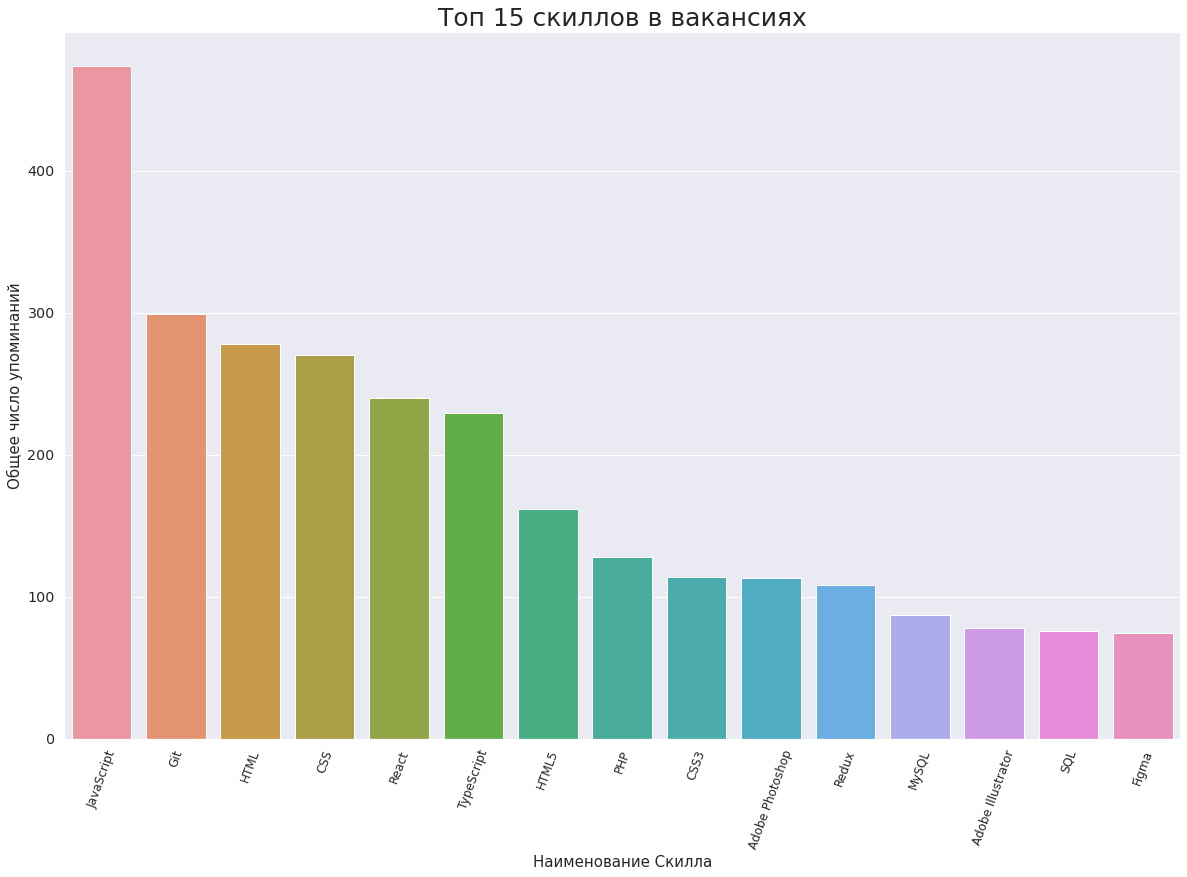

In [50]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 13))
ax = sns.barplot(data=top, x="name", y="count")
plt.title("Топ 15 скиллов в вакансиях", fontsize=25)
plt.ylabel("Общее число упоминаний", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize=12)
plt.xlabel("Наименование Скилла", fontsize=15)
print()

Построим круговую диаграмму

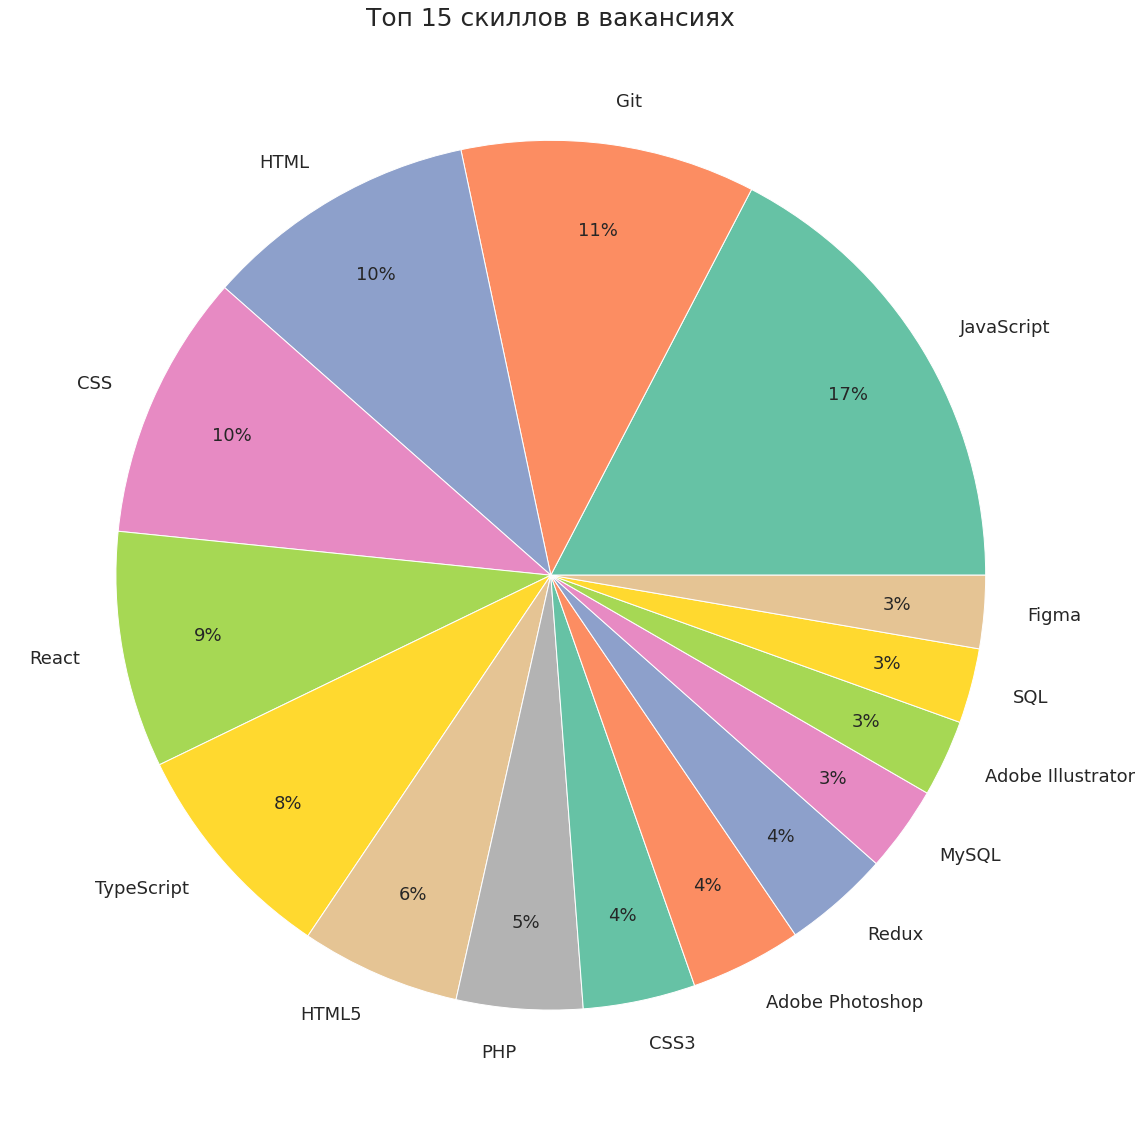

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.pie(
    top["count"],
    labels=top["name"],
    autopct="%2.f%%",
    pctdistance=0.8,
    textprops={"fontsize": 18},
)
plt.title("Топ 15 скиллов в вакансиях", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize=12)
print()

##### Преобразуем gross как раньше

In [52]:
frontend_table['salary.gross'] = frontend_table['salary.gross'].fillna(0.5)
frontend_table['salary.gross'] = frontend_table['salary.gross'].apply(make_gross)

Преобразуем ЗП с учетом gross

In [53]:
frontend_table["salary.gross"]
frontend_table["salary.from"] = frontend_table["salary.from"] * (
    1 - 0.13 * frontend_table["salary.gross"]
)
frontend_table["salary.to"] = frontend_table["salary.to"] * (
    1 - 0.13 * frontend_table["salary.gross"]
)

Если пропуск то считаем что это рубли

In [54]:
vacancy_table['salary.currency'].fillna('RUR', inplace=True)

Переводим доллары и евро в рубли

In [55]:
frontend_table.loc[vacancy_table["salary.currency"] == "USD", "salary.to"] *= 75.46
frontend_table.loc[vacancy_table["salary.currency"] == "USD", "salary.from"] *= 75.46
frontend_table.loc[vacancy_table["salary.currency"] == "EUR", "salary.to"] *= 80.19
frontend_table.loc[vacancy_table["salary.currency"] == "EUR", "salary.from"] *= 80.19


In [56]:
frontend_table['salary.currency'] = 'RUR'

##### Построим гистрограмму ЗП

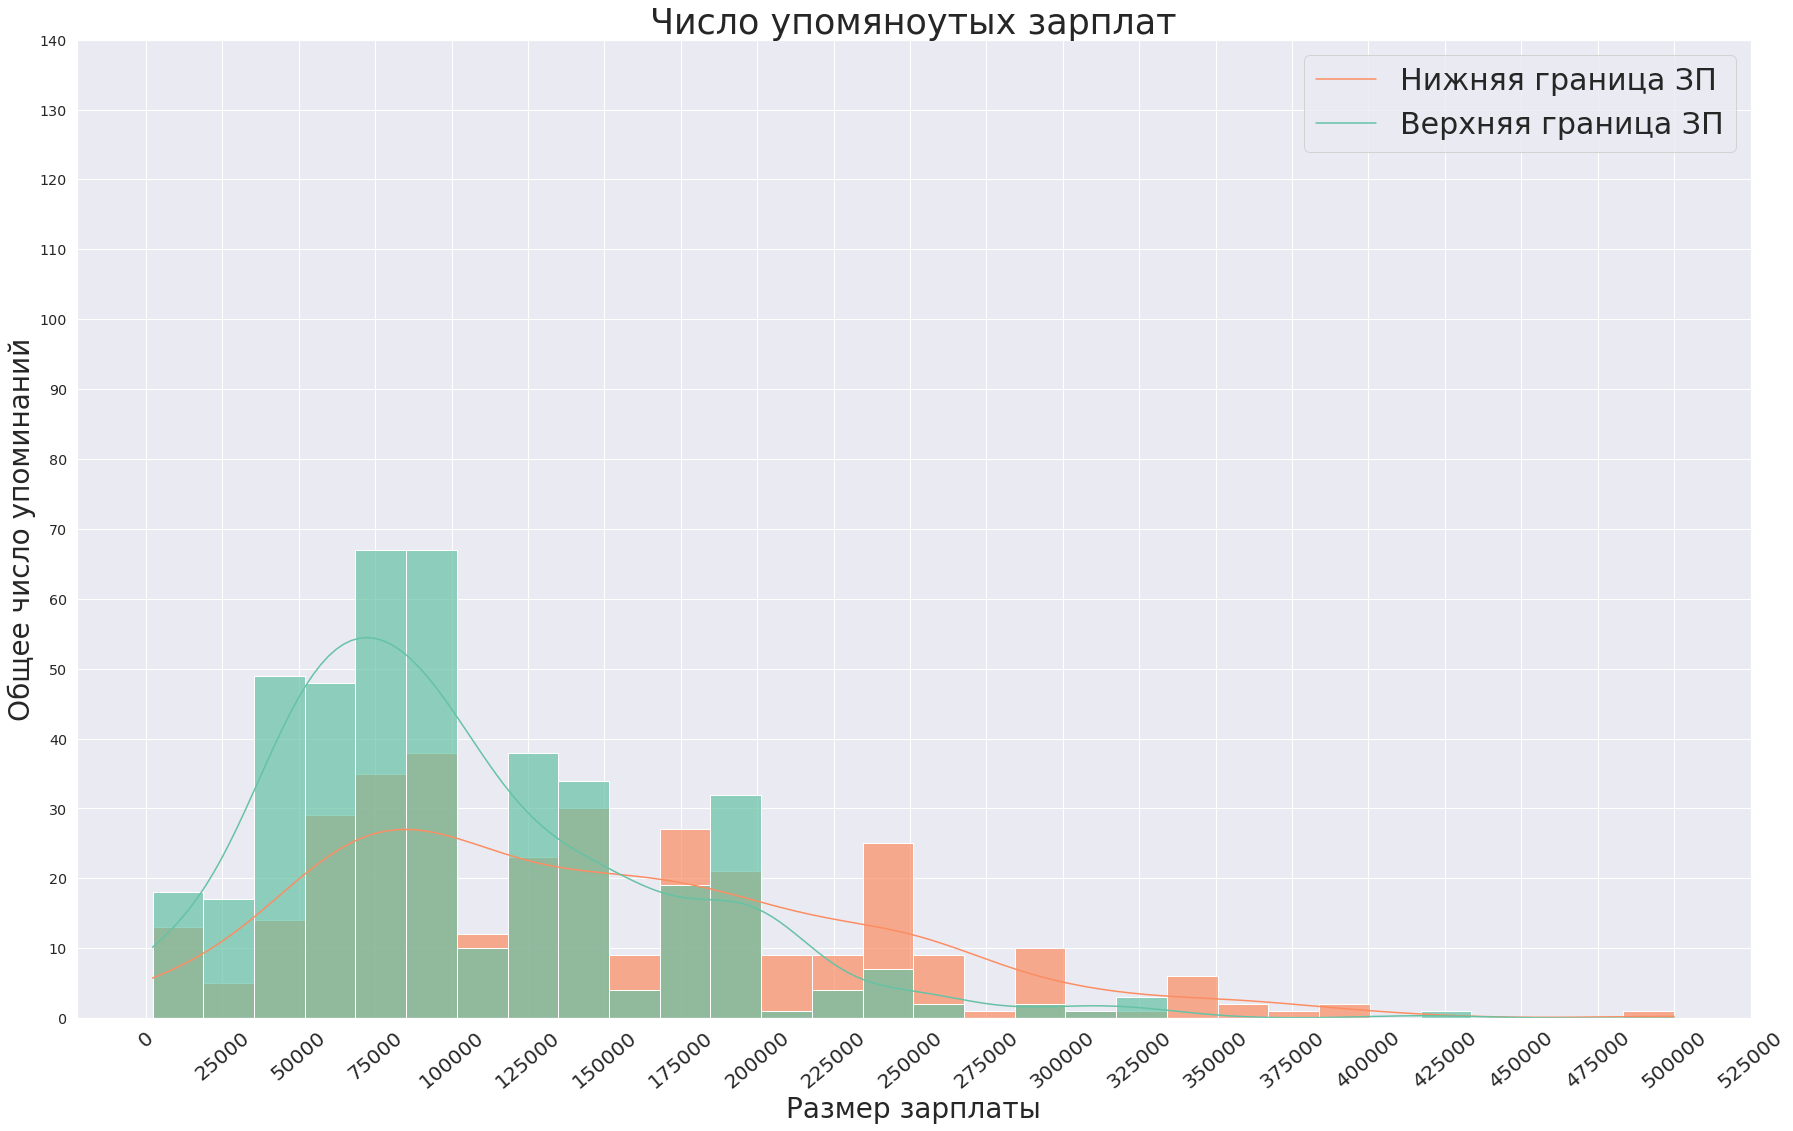

In [57]:
plt.subplots(figsize=(30, 18))
sns.histplot(
    data=frontend_table[["salary.from", "salary.to"]], bins=30, alpha=0.7, kde=True
)
plt.xticks(range(0, 550000, 25000), fontsize=20)
plt.yticks(range(0, 150, 10))
plt.title("Число упомяноутых зарплат", fontsize=35)
plt.ylabel("Общее число упоминаний", fontsize=28)
plt.xlabel("Размер зарплаты", fontsize=28)
plt.xticks(rotation=40)
plt.legend(labels=["Нижняя граница ЗП", "Верхняя граница ЗП"], fontsize=30)
print()


#### Вывод из графика:
1) Чаще всего зп колеблется от 50 до 100 т.р.  
2) так же много вакансий от 125 до 150 т.р.  
3) Нередко так же ЗП достигают 175-200 т.р. 


Не забывайте про выводы.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


Сгруппируем по опыту работы

In [58]:
grouped_exp = (
    main_df[["experience.name", "id"]]
    .groupby(["experience.name"], as_index=False)
    .count()
    .rename(columns={"id": "count"})
)
display(grouped_exp)

,experience.name,count
0,Более 6 лет,90
1,Нет опыта,159
2,От 1 года до 3 лет,1262
3,От 3 до 6 лет,1059


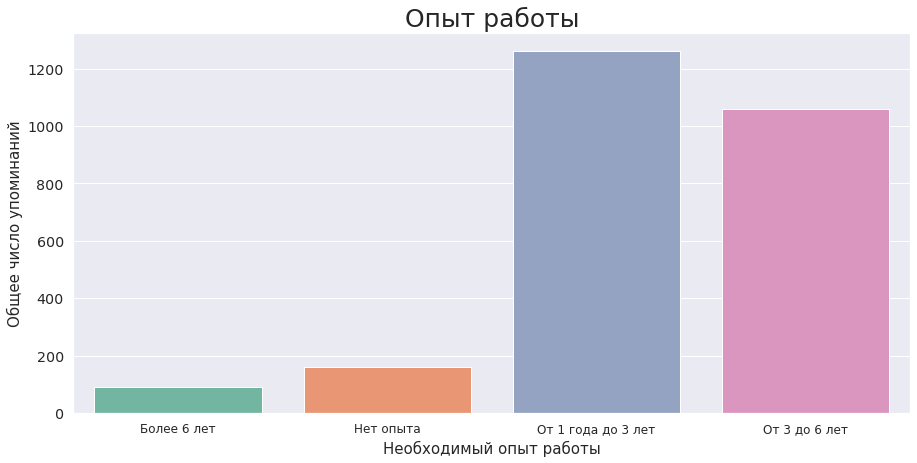

In [59]:
plt.figure(figsize = (15,7))
ax = sns.barplot(data = grouped_exp, x = 'experience.name', y = 'count')
plt.title("Опыт работы", fontsize=25)
plt.ylabel("Общее число упоминаний", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
plt.xlabel("Необходимый опыт работы", fontsize=15)
print()

#### Вывод из графика:
1) Опыт более 6 лет и вообще его отсутствие очень редко встречаются в вакансиях  
2) Абсолютное большинство вакансий требуют опыт от 1 до 3 лет и почти столько же от 3 до 6 лет  
3) Возможно это значит, что отсутствие опыта просто не востребовано на сайте в данной профессии, а при опыте более 6 лет, люди уже не пользуются этим сайтом для поиска  

Выделим топ 15 по популярности работодателей

In [166]:
employers = (
    main_df[["employer.name", "id"]]
    .groupby(by="employer.name", as_index=False)
    .count()
    .rename(columns={"id": "count"})
)
employers.sort_values(by="count", ascending=False, inplace=True)
employers = employers[0:15]

Построим по этим данным гистрограмму

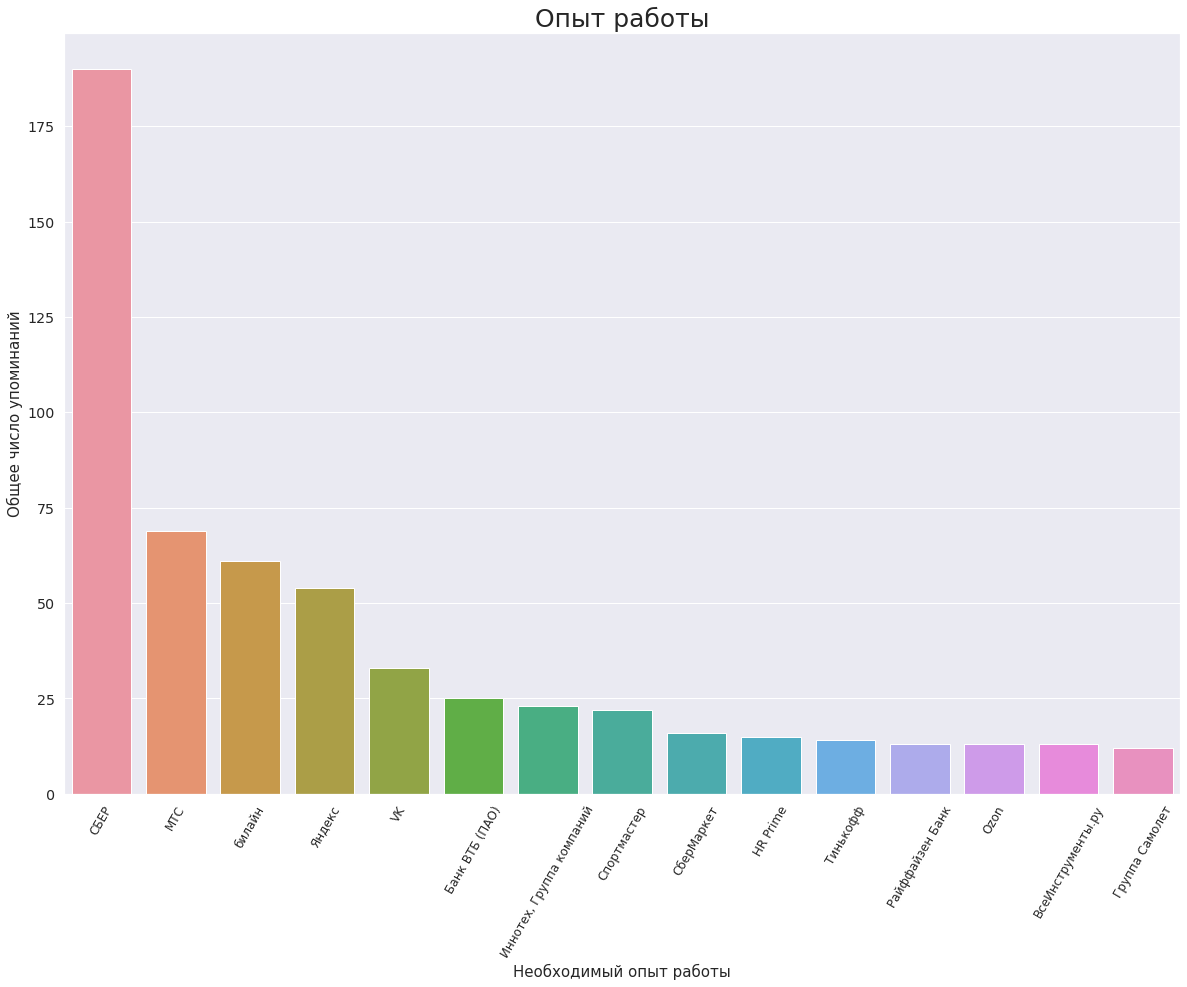

In [62]:
plt.figure(figsize=(20, 14))
ax = sns.barplot(data=employers, x="employer.name", y="count")
plt.title("Опыт работы", fontsize=25)
plt.ylabel("Общее число упоминаний", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=12)
plt.xlabel("Необходимый опыт работы", fontsize=15)
print()

Также построим круговую диаграмму:

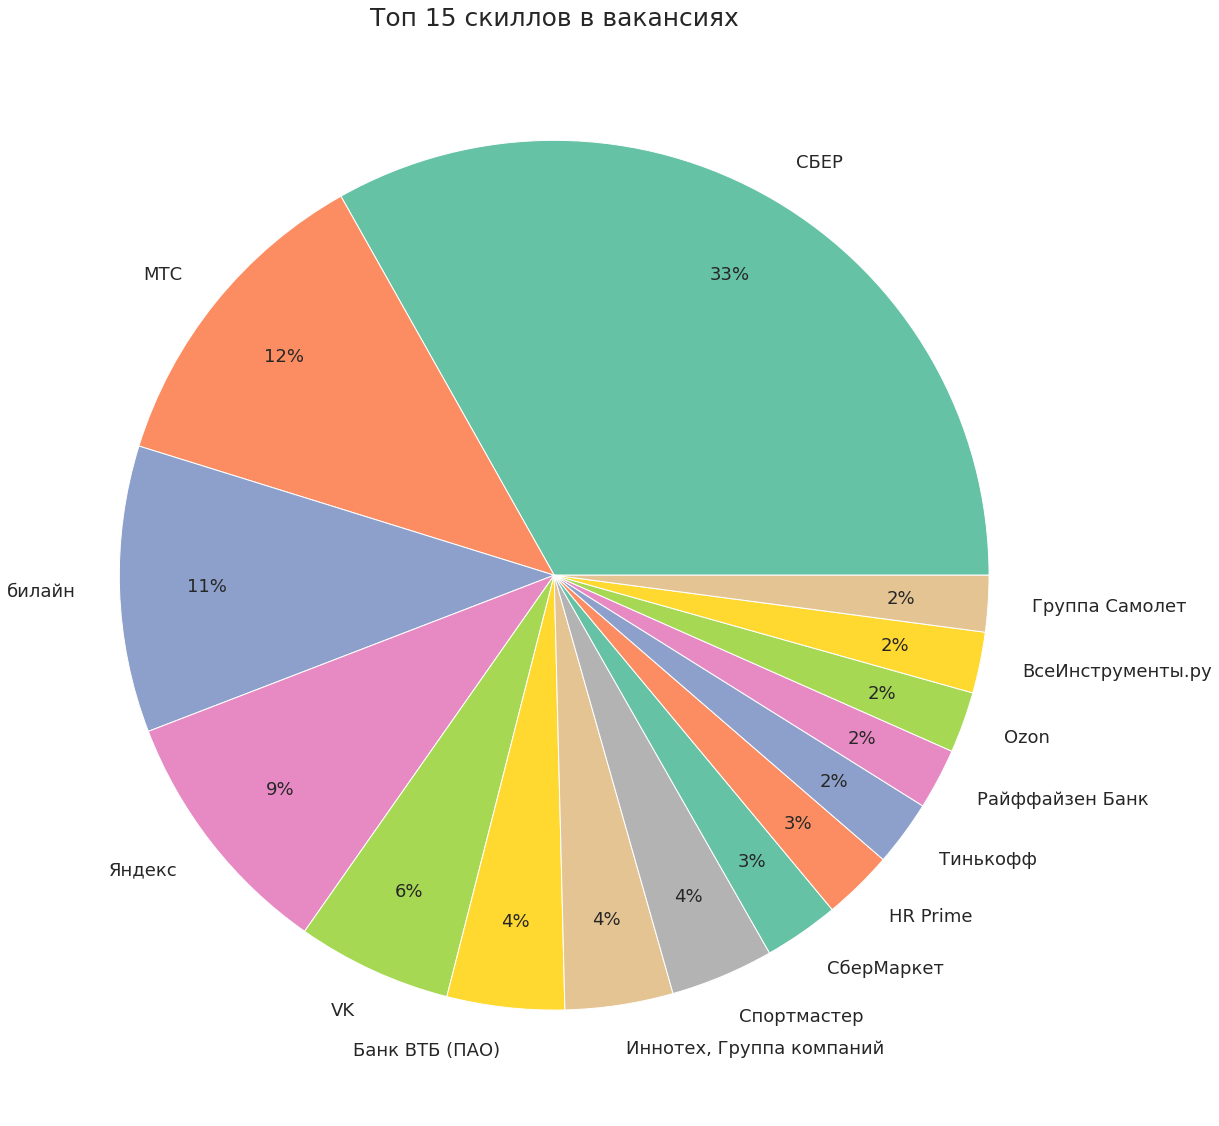

In [165]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.pie(
    x=employers["count"],
    labels=employers["employer.name"],
    autopct="%1.f%%",
    pctdistance=0.8,
    textprops={"fontsize": 18},
)
plt.title("Топ 15 скиллов в вакансиях", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize=12)
print()

##### Краткий вывод:
1) Из данных графиков явно видно, что Сбер фоварит и более трети вакансий от него  
2) Далее идут компании МТС, билайн, Яндекс примерно одинаковы по популярности  
3) Далее в топ 15 часто встречаются банки, со всем прочим сожно сказать, что вакансий в банках довольно много  

#### Теперь выделим широту и долготу и построим график на карте

In [87]:
geography = main_df[main_df["address.city"] == "Москва"][
    ["address.lat", "address.lng", "address.street"]
]

In [91]:
import plotly.express as px

center = dict(lat=geography["address.lat"].mean(), lon=geography["address.lng"].mean())

fig = px.scatter_mapbox(
    geography,
    lat="address.lat",
    lon="address.lng",
    size_max=4,
    mapbox_style="carto-positron",
    title="Businesses in Las Vegas",
    zoom=10,
    center=center,
    opacity=0.5,
)
fig.update_layout(
    height=950,
    width=1000,  # размер фигуры
    title_text="",  # заголовок графика
    title_font_size=46,  # размер заголовка
)

fig.show()

#### Краткий вывод:  
1) Часто вакансии по карте расположены небольшими кластерами  
2) Ближе к центру ваансий сильно больше(можно проследить разделение внутри и снаружи второго кольца)  


#### Выделим топ 20 по популярности улиц

In [163]:
street_distribution = (
    geography[["address.street", "address.lat"]]
    .groupby(by="address.street", as_index=False)
    .count()
    .rename(columns={"address.lat": "count"})
    .sort_values(by="count", ascending=False)
)

top_street = street_distribution[0:20]

Построим график

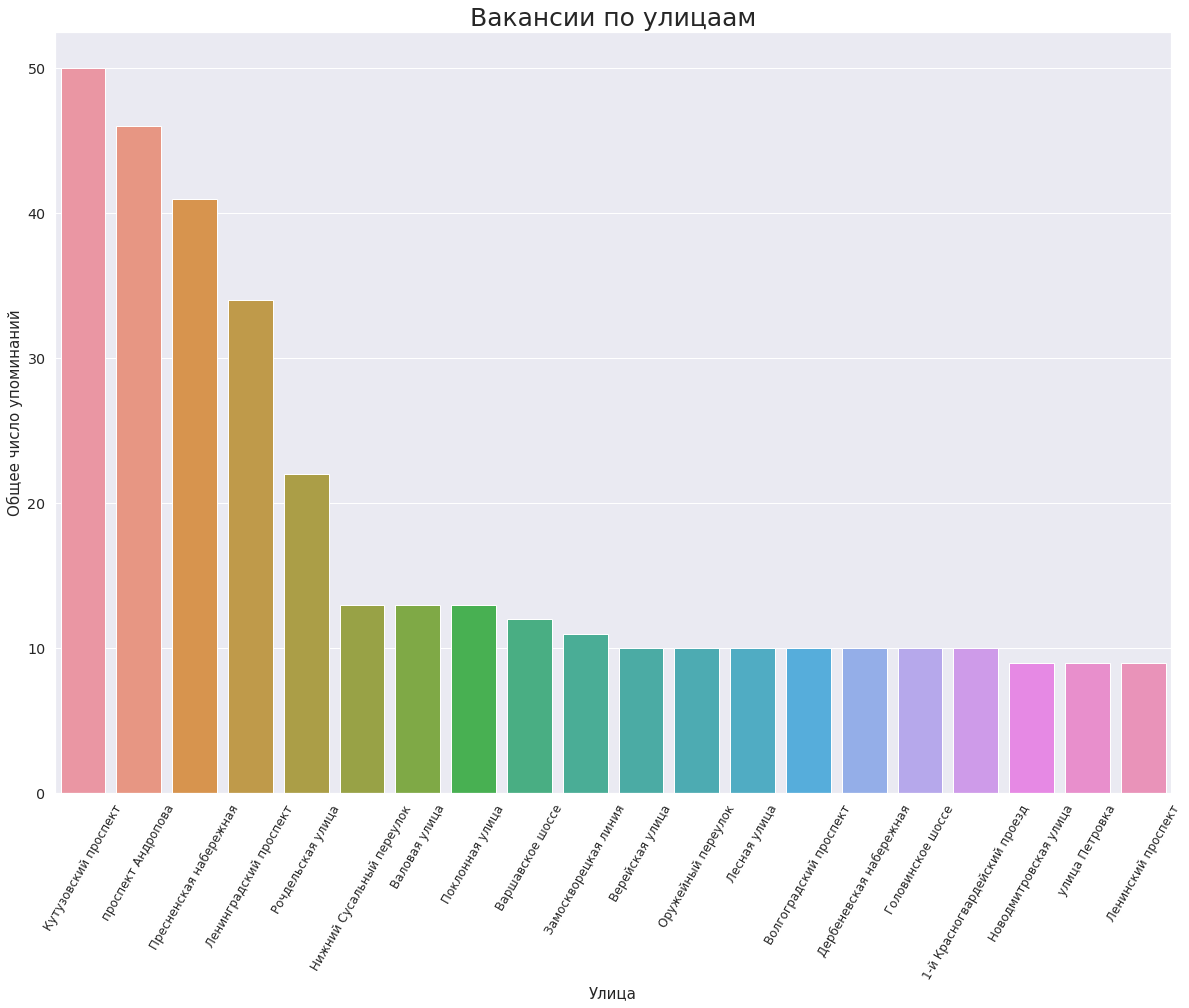

In [164]:
plt.figure(figsize = (20,14))
ax = sns.barplot(data = top_street, x = 'address.street', y = 'count')
plt.title("Вакансии по улицаам", fontsize=25)
plt.ylabel("Общее число упоминаний", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, fontsize = 12)
plt.xlabel("Улица", fontsize=15)
print()

#### Краткий вывод из графика:  
1) Есть 5 улиц на которых сосредоточены вакансии  
2) На остальных по крайней мере из топа, число вакансий примерно одинаковое  

Какие выводы можно сделать из построенных графиков?

1) В целом работу в сфере Анализа данных можно найти в любой точке Москвы но лучше искать за 2м кольцом  
2) Самые удобные улицы для поиска видны на графике выше  
3) ЗП как у Frontend разработчика так и у аналитиков колеблется от 50 до 150 т.р., иногда достигает и 175-200 т.р.  